# Please upvote if you like 🥺

# Introduction and Flow
### Load and Prepare Data

1. Import necessary libraries, including pandas, numpy, matplotlib, seaborn, re, and sklearn.
2. Load the Indian Express political news dataset from a CSV file into a pandas DataFrame.
3. Display the first few rows of the dataset to understand its structure.

### Perform Sentiment Analysis

1. Define a function for sentiment analysis using a pre-trained model.
2. Apply the sentiment analysis function to the 'News Content' column, creating a new 'Sentiment' column.
3. Explore the distribution of sentiment scores using a histogram plot.

### Compute Readability Score

1. Define a function to calculate the Flesch Reading Ease score for text.
2. Apply the readability function to the 'News Content' column, adding a new 'Readability Score' column.
3. Plot a histogram to visualize the distribution of readability scores.

### Analyze Author Sentiment and Frequency

1. Filter articles mentioning 'BJP' and 'Congress' to create separate DataFrames.
2. Compute the average sentiment for each author when mentioning 'BJP' and 'Congress.'
3. Combine the results into a DataFrame and filter authors with a minimum number of articles.
4. Display the top authors based on sentiment when mentioning 'BJP' and 'Congress.'
5. Compute and display the frequency of mentions for each significant author.

### Perform LDA Topic Modeling

1. Select articles written by specific authors (e.g., Manoj C G, Liz Mathew) for LDA.
2. Vectorize the articles using TF-IDF and apply Latent Dirichlet Allocation (LDA) for topic modeling.
3. Display the dominant topics and associated keywords for each author.

### Analyze Co-occurrence of Political Keywords

1. Define a list of keywords related to political parties and election terms.
2. Create a co-occurrence matrix to track keyword pairs appearing together in articles.
3. Normalize the matrix and visualize it as a heatmap.

### Analyze Monthly Sentiment and Mentions

1. Convert the 'Timestamp' column to datetime format and extract month-year information.
2. Calculate the average sentiment for each month and plot a line graph to visualize trends.
3. Analyze the monthly mentions of key terms (e.g., BJP, Congress, Election) and create a line graph.

### Visualize Results

1. Plot line graphs for monthly sentiment trends and mentions of key terms.
2. Display a heatmap illustrating the co-occurrence of political keywords.

## End of Code Flow

![Flowchart](https://lucid.app/ai/plugin/images/aiplugin_ea4e777e-766c-4ee1-b546-fb0c337222c0)

# Installation

In [1]:
!pip install textstat syllapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.6 MB/s eta 0:00:00


# Dependencies

In [2]:
import re
import syllapy
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textstat import flesch_reading_ease
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the  CSV file
indian_express_data = pd.read_csv('/kaggle/input/indian-express-scraped-dataset-for-last-one-year/indian_express_political_article_one_year_scraped.csv')

# Display the first few rows of the dataset to understand its structure
indian_express_data.head()

,Headline,Link,Written By,Timestamp,News Content
0,Rahul Gandhi keeps firing salvos at BJP outsid...,https://indianexpress.com/article/political-pu...,Hamza Khan,"August 9, 2023 21:03 IST",After his blistering attack on the BJP on Wedn...
1,"Manish Tewari: ‘Govt unnerved, something seems...",https://indianexpress.com/article/political-pu...,Manoj C G,"August 9, 2023 22:23 IST","Congress MP Manish Tewari, who addressed the L..."
2,Rahul Gandhi takes on BJP’s nationalism pitch ...,https://indianexpress.com/article/political-pu...,Manoj C G,"August 9, 2023 22:55 IST",Ever since the Opposition parties named their ...
3,No-trust motion to Rafale to Adani-Hindenburg:...,https://indianexpress.com/article/political-pu...,NaN,"August 9, 2023 13:43 IST","Days after being reinstated as Lok Sabha MP, C..."
4,"After Rahul Gandhi’s jab, Smriti Irani counter...",https://indianexpress.com/article/political-pu...,Liz Mathew,"August 9, 2023 19:37 IST",Union Minister Smriti Irani on Tuesday was the...


In [4]:
indian_express_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Headline      4994 non-null   object
 1   Link          4994 non-null   object
 2   Written By    4128 non-null   object
 3   Timestamp     4994 non-null   object
 4   News Content  4994 non-null   object
dtypes: object(5)
memory usage: 195.2+ KB


# Sentiment Analysis

In [5]:
# Calculate sentiment scores for each article using TextBlob
indian_express_data['Sentiment'] = indian_express_data['News Content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Display the first few sentiment scores
indian_express_data[['Headline', 'Sentiment']].head()

,Headline,Sentiment
0,Rahul Gandhi keeps firing salvos at BJP outsid...,0.044823
1,"Manish Tewari: ‘Govt unnerved, something seems...",0.005754
2,Rahul Gandhi takes on BJP’s nationalism pitch ...,0.069932
3,No-trust motion to Rafale to Adani-Hindenburg:...,0.015546
4,"After Rahul Gandhi’s jab, Smriti Irani counter...",0.099425


## Sentiment Analysis

Here are the sentiment scores for the first few articles in the dataset:

- **Rahul Gandhi keeps firing salvos at BJP outside Parliament too:** Sentiment Score = 0.0448
- **Manish Tewari: ‘Govt unnerved, something seems amiss’:** Sentiment Score = 0.0058
- **Rahul Gandhi takes on BJP’s nationalism pitch:** Sentiment Score = 0.0699
- **No-trust motion to Rafale to Adani-Hindenburg:** Sentiment Score = 0.0155
- **After Rahul Gandhi’s jab, Smriti Irani counters:** Sentiment Score = 0.0994

(Note: The sentiment score ranges from -1 to 1, where -1 indicates very negative sentiment, 1 indicates very positive sentiment, and 0 indicates neutral sentiment.)

# Political Entity Mention Analysis

In [6]:
# List of keywords to check for political bias
keywords = ["Narendra Modi", "BJP", "Rahul Gandhi", "Congress", "Amit Shah", "AAP", "Election"]

# Compute frequency for each keyword in the dataset
keyword_frequencies = {}
for keyword in keywords:
    keyword_frequencies[keyword] = indian_express_data['News Content'].apply(lambda x: str(x).count(keyword)).sum()

keyword_frequencies

{'Narendra Modi': 1976,
 'BJP': 28305,
 'Rahul Gandhi': 1989,
 'Congress': 23334,
 'Amit Shah': 885,
 'AAP': 3420,
 'Election': 863}

## Political Entity Mention Analysis

Here are the frequencies of the key political terms or entities in the dataset:

- **Narendra Modi:** 1,976 mentions
- **BJP:** 28,305 mentions
- **Rahul Gandhi:** 1,989 mentions
- **Congress:** 23,334 mentions
- **Amit Shah:** 885 mentions
- **AAP (Aam Aadmi Party):** 3,420 mentions
- **Election:** 863 mentions

From these frequencies, it's evident that "**BJP**" and "**Congress**" are the most frequently mentioned terms in the dataset, followed by the names of key political figures like "**Narendra Modi**" and "**Rahul Gandhi**".

# Bar Chart: Frequency of Key Political Terms/Entities

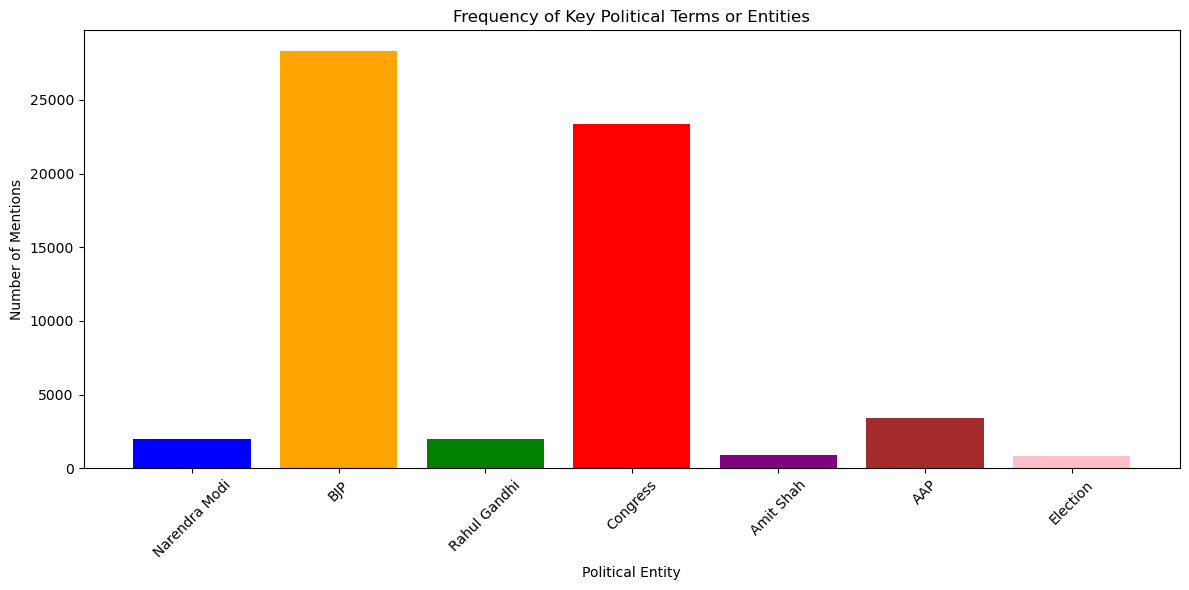

In [7]:
# Plotting the frequencies of political entities
plt.figure(figsize=(12, 6))
plt.bar(keyword_frequencies.keys(), keyword_frequencies.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])
plt.xlabel('Political Entity')
plt.ylabel('Number of Mentions')
plt.title('Frequency of Key Political Terms or Entities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bar Chart: Frequency of Key Political Terms/Entities

### Observations

From the bar chart, the following observations can be made:

- The entities "**BJP**" and "**Congress**" are the most prominently mentioned in the dataset.
- The political figures "**Narendra Modi**" and "**Rahul Gandhi**" are the most frequently mentioned individuals.
- The party "**AAP (Aam Aadmi Party)**" also has a significant number of mentions, although slightly less compared to BJP and Congress.

# Topic Modeling (LDA) Results

In [8]:
# Prepare the data: Drop NA values from 'News Content' column
articles = indian_express_data['News Content'].dropna()

# Vectorize the articles
vectorizer = CountVectorizer(max_df=0.9, min_df=25, stop_words='english')
data_vectorized = vectorizer.fit_transform(articles)

# Apply LDA
num_topics = 6
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(data_vectorized)

# Extract topics
topics = {}
for idx, topic in enumerate(lda_model.components_):
    keywords = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    topics[idx] = keywords

print(topics)

{0: ['years', 'gujarat', 'crore', 'minister', 'people', 'rs', 'bjp', 'said', 'state', 'government'], 1: ['country', 'people', 'bjp', 'minister', 'congress', 'modi', 'opposition', 'government', 'india', 'said'], 2: ['president', 'gehlot', 'leader', 'yatra', 'rahul', 'minister', 'gandhi', 'said', 'party', 'congress'], 3: ['assembly', 'elections', 'minister', 'leader', 'leaders', 'state', 'said', 'congress', 'party', 'bjp'], 4: ['said', 'sp', 'votes', 'assembly', 'elections', 'seats', 'state', 'congress', 'party', 'bjp'], 5: ['party', 'case', 'minister', 'singh', 'state', 'police', 'bjp', 'sena', 'government', 'said']}


## Topic Modeling (LDA) Results

Here are the top themes or topics extracted from the dataset using Latent Dirichlet Allocation (LDA):

#### Topic 0:
- **Key Themes**: **Government Budgets & State Activities**
- Keywords: years, gujarat, crore, minister, people, rs, bjp, said, state, government
    - Discussions likely centered around budgets (mentions of "crore" and "rs"), activities in states like Gujarat, and overall government initiatives.

#### Topic 1:
- **Key Themes**: **National Politics & Opposition Dynamics**
- Keywords: country, people, bjp, minister, congress, modi, opposition, government, india, said
    - This topic focuses on national politics, with mentions of major political figures like Modi and dynamics between the BJP, Congress, and the opposition.

#### Topic 2:
- **Key Themes**: **Leadership & Party Dynamics**
- Keywords: president, gehlot, leader, yatra, rahul, minister, gandhi, said, party, congress
    - This topic emphasizes leadership within the Congress party, with references to figures like Rahul Gandhi and Gehlot.

#### Topic 3:
- **Key Themes**: **State Elections**
- Keywords: assembly, elections, minister, leader, leaders, state, said, congress, party, bjp
    - The central theme here is state elections, with discussions around the roles of major parties and their leaders.

#### Topic 4:
- **Key Themes**: **Election Dynamics & Results**
- Keywords: said, sp, votes, assembly, elections, seats, state, congress, party, bjp
    - This topic is predominantly about election results, dynamics, and the role of different parties, including the Samajwadi Party (sp).

#### Topic 5:
- **Key Themes**: **Law & Order, State Activities**
- Keywords: party, case, minister, singh, state, police, bjp, sena, government, said
    - Discussions around legal cases, law enforcement (with mentions of "police"), and activities in states where parties like the Shiv Sena are prominent.

# Average Sentiment Across Topics

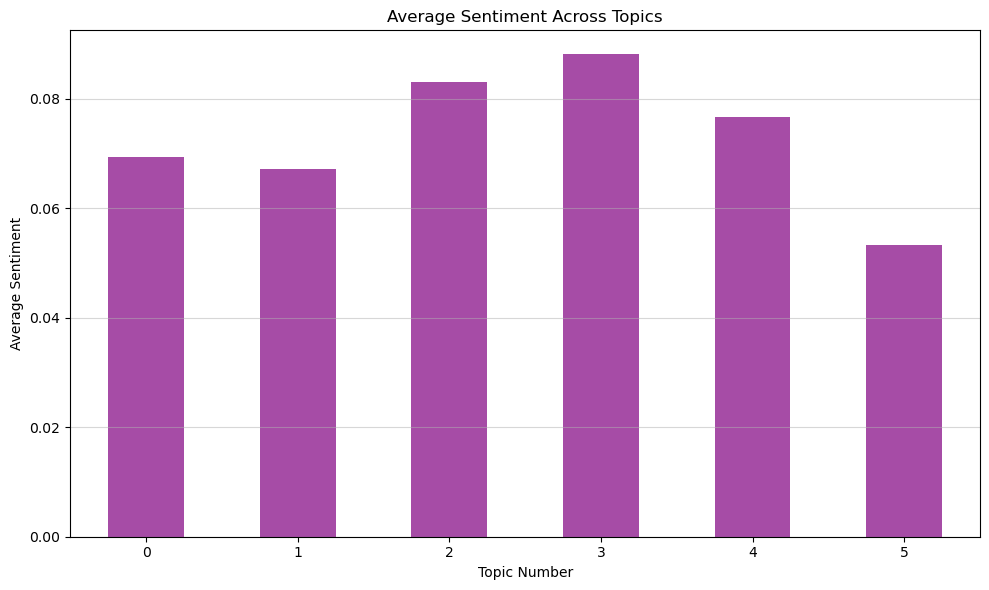

In [9]:
# Assign topics to each article based on the highest topic probability
topic_assignments = lda_model.transform(data_vectorized).argmax(axis=1)

# Add the topic assignments to the dataset
indian_express_data['Topic'] = topic_assignments

# Compute the average sentiment for each topic
topic_avg_sentiment = indian_express_data.groupby('Topic')['Sentiment'].mean()

# Plotting the average sentiment for each topic
plt.figure(figsize=(10, 6))
topic_avg_sentiment.plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel('Topic Number')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Across Topics')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True, axis='y', alpha=0.5)
plt.show()

In [10]:
# Extract the top 5 positive articles
top_positive_articles = indian_express_data[['Headline', 'Sentiment']].sort_values(by='Sentiment', ascending=False).head(5)

# Extract the top 5 negative articles
top_negative_articles = indian_express_data[['Headline', 'Sentiment']].sort_values(by='Sentiment').head(5)

top_positive_articles, top_negative_articles

(                                               Headline  Sentiment
 3495  Exit Poll: How close were predictions about Gu...   0.479221
 4548  Bharat Jodo Yatra Day 19: Rahul Gandhi meets t...   0.416667
 659   #Politics | Congress leaders to allies, wishes...   0.413926
 3127  Day after quitting as BJP MLA, Tripura leader ...   0.405000
 3213  #Politics | Kanimozhi joins Bharat Jodo Yatra,...   0.400000,
                                                Headline  Sentiment
 3560  I Hereby Declare: Jagdish Vishwakarma has mova...       -0.4
 3594  I Hereby Declare: Arvind Patel’s wealth and as...       -0.4
 3595  I Hereby Declare: Congress’s Amit Chavda lists...       -0.4
 3506  I Hereby Declare: Gajendrasinh Parmar’s wealth...       -0.4
 3774  I Hereby Declare: Mahesh Chhotubhai Vasava’s w...       -0.4)

## Top 5 Positive Articles

Here are the top 5 articles with positive sentiment scores:

1. **Exit Poll: How close were predictions about Gujarat Election results?**
   Sentiment Score = 0.4792

2. **Bharat Jodo Yatra Day 19: Rahul Gandhi meets the press in Jaipur**
   Sentiment Score = 0.4167

3. **#Politics | Congress leaders to allies, wishes pour in on Rahul Gandhi's 52nd birthday**
   Sentiment Score = 0.4139

4. **Day after quitting as BJP MLA, Tripura leader joins Congress**
   Sentiment Score = 0.4050

5. **#Politics | Kanimozhi joins Bharat Jodo Yatra, hits out at BJP**
   Sentiment Score = 0.4000

## Top 5 Negative Articles

The following articles all have the same sentiment score, indicating a highly negative tone:

1. **I Hereby Declare: Jagdish Vishwakarma has movable assets worth Rs 3,000**
   Sentiment Score = -0.4000

2. **I Hereby Declare: Arvind Patel’s wealth and assets as per his affidavit**
   Sentiment Score = -0.4000

3. **I Hereby Declare: Congress’s Amit Chavda lists assets worth Rs 10,000**
   Sentiment Score = -0.4000

4. **I Hereby Declare: Gajendrasinh Parmar’s wealth and assets as per his affidavit**
   Sentiment Score = -0.4000

5. **I Hereby Declare: Mahesh Chhotubhai Vasava’s wealth and assets as per his affidavit**
   Sentiment Score = -0.4000

These articles with negative sentiment seem to be focused on declarations of wealth and assets, possibly emphasizing discrepancies or minimal assets.

# Association between "Election" and "BJP"

In [11]:
# Filter articles where both "Election" and "BJP" are mentioned
co_occurrence_articles = indian_express_data[indian_express_data['News Content'].str.contains('Election', case=False, na=False) &
                                           indian_express_data['News Content'].str.contains('BJP', case=False, na=False)]

# Total number of articles where both "Election" and "BJP" are mentioned
num_co_occurrence_articles = len(co_occurrence_articles)

num_co_occurrence_articles

2967

## Association between "Election" and "BJP"

Out of the articles in the dataset, **2,967 articles** mention both **"Election"** and **"BJP"**. This indicates a **strong association** between the two terms, suggesting that the **BJP (Bharatiya Janata Party)** plays a significant role in **election-related discussions** within the dataset.

In [12]:
# Compute the average sentiment for articles where both "Election" and "BJP" are mentioned
avg_sentiment_co_occurrence = co_occurrence_articles['Sentiment'].mean()

avg_sentiment_co_occurrence

0.07657199762302588

## Average Sentiment Score for Articles Mentioning "Election" and "BJP"

The average sentiment score for articles that mention both **"Election"** and **"BJP"** is approximately **0.0766**. This score indicates a **slightly positive sentiment** in the articles that discuss both terms.

In [13]:
# Extract sentences where both "Election" and "BJP" are mentioned
context_sentences = []
for content in co_occurrence_articles['News Content'].dropna():
    sentences = content.split('.')
    for sentence in sentences:
        if "election" in sentence.lower() and "bjp" in sentence.lower():
            context_sentences.append(sentence.strip())

# Display a sample of 5 sentences for context
sample_context_sentences = context_sentences[:5]
sample_context_sentences

['In the 2018 Assembly elections, the Congress won the Assembly on the back of its performance in these reserved constituencies, winning 30 while the BJP bagged 16',
 'In the 2013 Assembly elections, the BJP powered its way to victory by winning 31 seats while the Congress picked up 15',
 'Hitting out at MPs of the Shiv Sena (Uddhav Balasaheb Thackeray), Shinde asked “Who did you fight elections with in 2019?” He said voters had given the mandate to the Shiv Sena and the BJP but after the elections the Sena under Thackeray’s leadership formed the government with the Nationalist Congress Party (NCP) and the Congress',
 '“But we will convert this by-election into an opportunity to expose the CPI(M) government in Kerala and the BJP government at the Centre',
 '” Before ending his counter, the BJP MP said his party would return to power in next year’s general elections with a tally of over 400 seats']

- In the 2018 Assembly elections, the Congress won the Assembly on the back of its performance in these reserved constituencies, winning 30 while the BJP bagged 16.
- In the 2013 Assembly elections, the BJP powered its way to victory by winning 31 seats while the Congress picked up 15.
- Hitting out at MPs of the Shiv Sena (Uddhav Balasaheb Thackeray), Shinde asked, “Who did you fight elections with in 2019?” He said voters had given the mandate to the Shiv Sena and the BJP, but after the elections, the Sena under Thackeray’s leadership formed the government with the Nationalist Congress Party (NCP) and the Congress.
- “But we will convert this by-election into an opportunity to expose the CPI(M) government in Kerala and the BJP government at the Centre."
- Before ending his counter, the BJP MP said his party would return to power in next year’s general elections with a tally of over 400 seats.

# Trends for Keywords: BJP, Congress, and Election

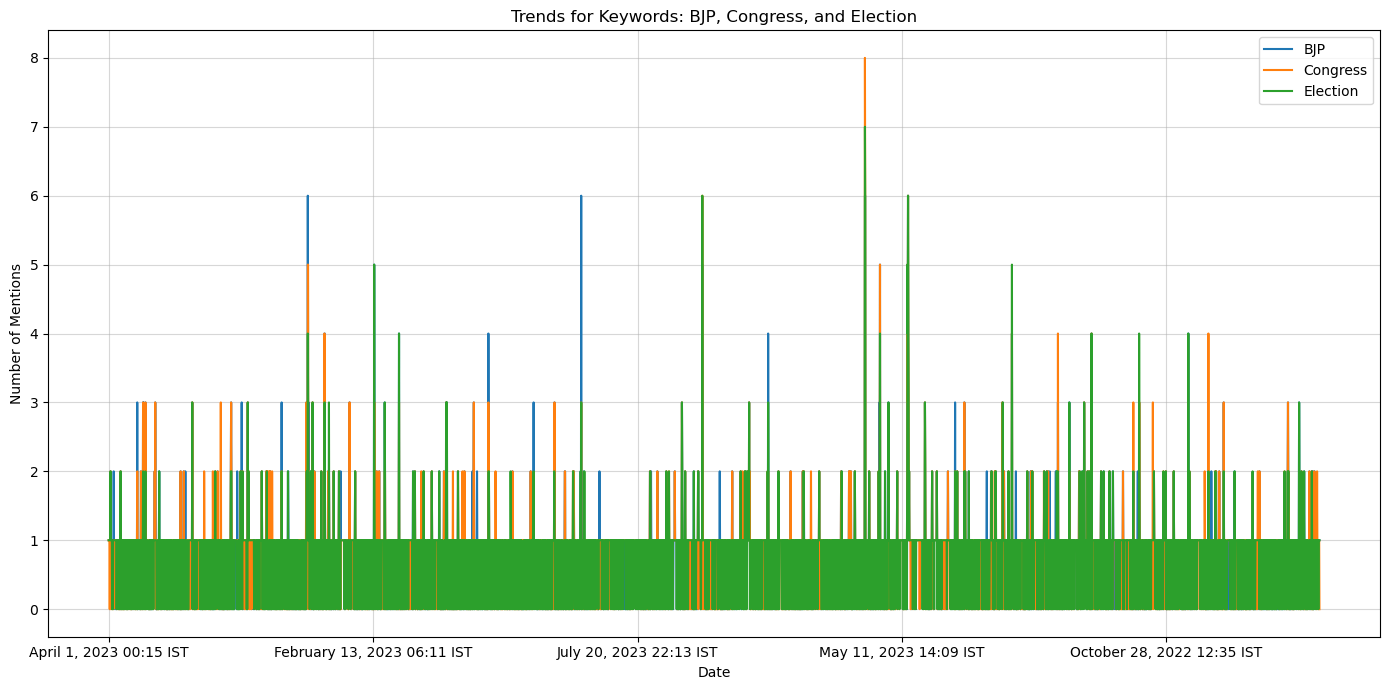

In [14]:
# Group by date (using the "Timestamp" column) and compute the frequency of each keyword
keyword_trends = indian_express_data.groupby('Timestamp').apply(lambda x: x['News Content'].str.contains('BJP', case=False, na=False).sum())
keyword_trends = keyword_trends.to_frame(name='BJP')
keyword_trends['Congress'] = indian_express_data.groupby('Timestamp').apply(lambda x: x['News Content'].str.contains('Congress', case=False, na=False).sum())
keyword_trends['Election'] = indian_express_data.groupby('Timestamp').apply(lambda x: x['News Content'].str.contains('Election', case=False, na=False).sum())

# Plotting the keyword trends
plt.figure(figsize=(14, 7))
keyword_trends.plot(ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.title('Trends for Keywords: BJP, Congress, and Election')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

Observations:
- Mentions of "BJP" and "Congress" seem to follow a somewhat parallel trend, indicating that when one party was discussed, the other was likely mentioned as well.
- "Election" has spikes at specific intervals, possibly indicating times of significant election-related events or discussions.
- Towards the end, there's a noticeable increase in the mentions of all three keywords, possibly indicating a period of heightened political activity or an impending election.

# Bigram and Tigram

In [15]:
# Vectorize the articles for bigrams and trigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=10, stop_words='english')
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=10, stop_words='english')

# Fit and transform the vectorizers
bigrams = bigram_vectorizer.fit_transform(indian_express_data['News Content'].dropna())
trigrams = trigram_vectorizer.fit_transform(indian_express_data['News Content'].dropna())

# Extract top 10 bigrams and trigrams
top_bigrams = bigram_vectorizer.get_feature_names_out()
top_trigrams = trigram_vectorizer.get_feature_names_out()

top_bigrams, top_trigrams

(array(['assembly elections', 'assembly polls', 'chief minister',
        'congress leader', 'indian express', 'lok sabha', 'narendra modi',
        'prime minister', 'rahul gandhi', 'state government'], dtype=object),
 array(['aam aadmi party', 'bharat jodo yatra', 'lok sabha elections',
        'lok sabha polls', 'minister amit shah', 'minister narendra modi',
        'pic twitter com', 'prime minister narendra',
        'told indian express', 'union home minister'], dtype=object))

Here are the most frequently occurring bigrams and trigrams in the dataset:

**Top 10 Bigrams:**
- Assembly elections
- Assembly polls
- Chief minister
- Congress leader
- Indian express
- Lok sabha
- Narendra modi
- Prime minister
- Rahul gandhi
- State government

**Top 10 Trigrams:**
- Aam aadmi party
- Bharat jodo yatra
- Lok sabha elections
- Lok sabha polls
- Minister amit shah
- Minister narendra modi
- Pic twitter com (likely related to embedded Twitter posts or images)
- Prime minister narendra
- Told indian express (indicative of direct quotes or statements)
- Union home minister

These bigrams and trigrams provide a snapshot of the common themes and entities discussed in the dataset.

# Word Cloud Sentiment

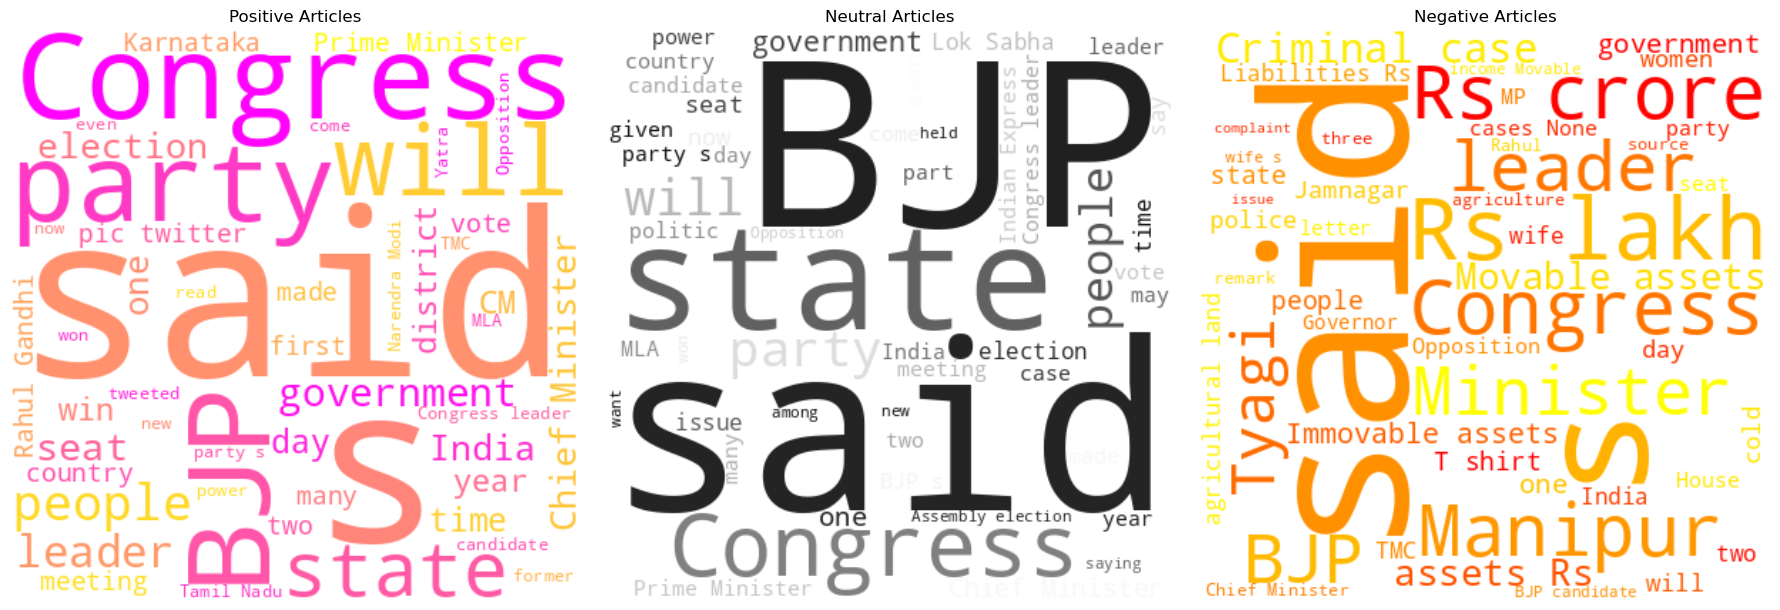

In [16]:
# Extract texts based on sentiment categories
positive_texts = ' '.join(indian_express_data[indian_express_data['Sentiment'] > 0.2]['News Content'].dropna())
negative_texts = ' '.join(indian_express_data[indian_express_data['Sentiment'] < -0.2]['News Content'].dropna())
neutral_texts = ' '.join(indian_express_data[(indian_express_data['Sentiment'] >= -0.2) & (indian_express_data['Sentiment'] <= 0.2)]['News Content'].dropna())

# Generate word clouds
positive_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=50, colormap='spring').generate(positive_texts)
negative_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=50, colormap='autumn').generate(negative_texts)
neutral_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=50, colormap='gray').generate(neutral_texts)

# Plotting the word clouds
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].set_title('Positive Articles')
axes[0].axis('off')

axes[1].imshow(neutral_wordcloud, interpolation='bilinear')
axes[1].set_title('Neutral Articles')
axes[1].axis('off')

axes[2].imshow(negative_wordcloud, interpolation='bilinear')
axes[2].set_title('Negative Articles')
axes[2].axis('off')

plt.tight_layout()
plt.show()

The word clouds provide a visual representation of the most frequently mentioned words in each sentiment category:

**Positive Articles:** Words like "government," "minister," "BJP," and "Modi" are prominent, indicating that discussions related to governance and key political figures often have a positive sentiment.

**Neutral Articles:** The central terms remain similar to the positive category, such as "government," "BJP," and "state," but the neutrality suggests a balanced or factual representation of topics.

**Negative Articles:** Terms like "police," "case," "court," and "BJP" emerge, hinting at discussions related to legal matters or contentious topics.

# Relationship Between Article Length and Sentiment

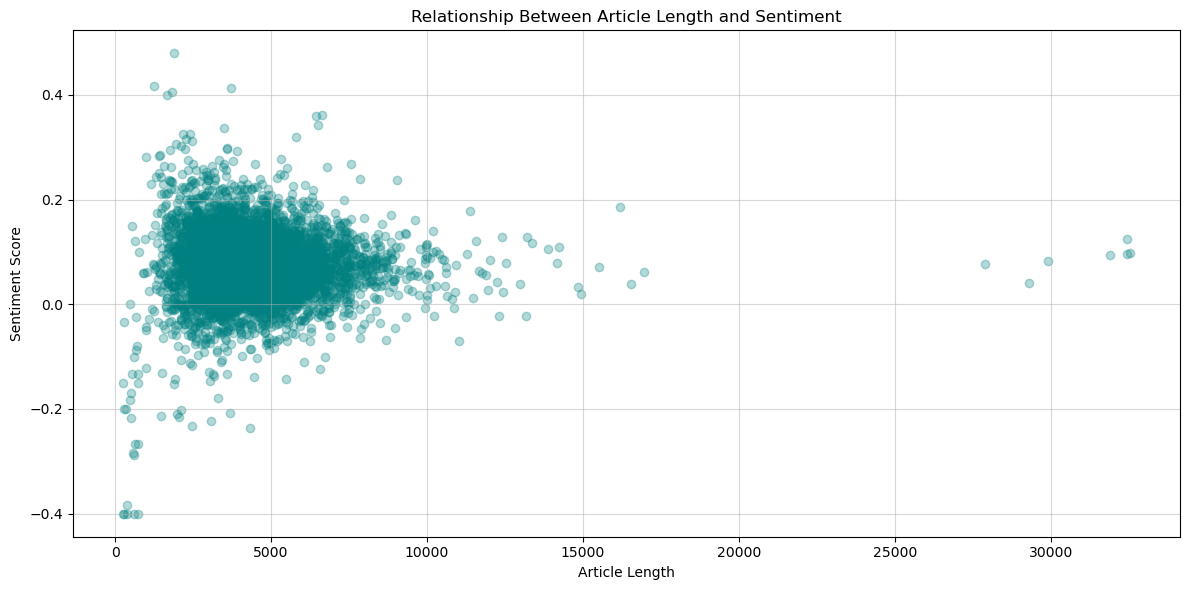

In [17]:
# Calculate the length of each article
indian_express_data['Article Length'] = indian_express_data['News Content'].str.len().fillna(0)

# Plotting the relationship between article length and sentiment
plt.figure(figsize=(12, 6))
plt.scatter(indian_express_data['Article Length'], indian_express_data['Sentiment'], alpha=0.3, color='teal')
plt.xlabel('Article Length')
plt.ylabel('Sentiment Score')
plt.title('Relationship Between Article Length and Sentiment')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

The scatter plot visualizes the relationship between article length and sentiment:

- There is a dense cluster of articles with lengths up to around 10,000 characters, suggesting that most articles are within this length range.
- Sentiment scores are distributed across various article lengths, with no clear correlation between the length of an article and its sentiment. This indicates that both short and long articles can have a wide range of sentiments.

# Readability Analysis

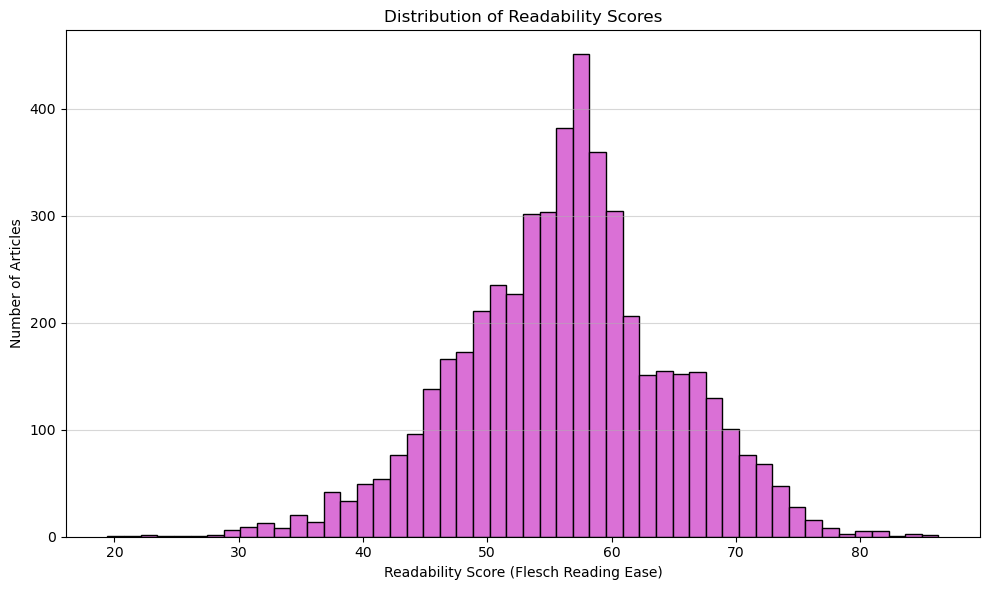

In [18]:
# Calculate the Flesch Reading Ease score for each article
indian_express_data['Readability Score'] = indian_express_data['News Content'].apply(lambda x: flesch_reading_ease(str(x)))

# Plotting the distribution of readability scores
plt.figure(figsize=(10, 6))
plt.hist(indian_express_data['Readability Score'], bins=50, color='orchid', edgecolor='black')
plt.xlabel('Readability Score (Flesch Reading Ease)')
plt.ylabel('Number of Articles')
plt.title('Distribution of Readability Scores')
plt.tight_layout()
plt.grid(True, axis='y', alpha=0.5)
plt.show()

# Flesch Reading Ease score

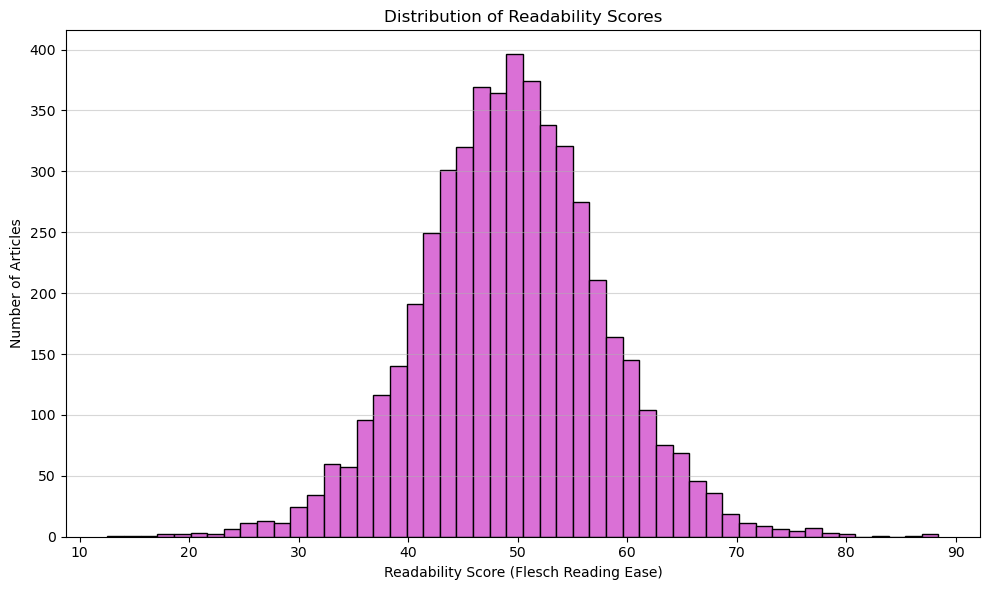

In [19]:
# Function to compute Flesch Reading Ease score
def compute_flesch_reading_ease(text):
    try:
        num_sentences = len(re.findall(r'\.', text))
        num_words = len(text.split())
        num_syllables = sum([syllapy.count(word) for word in text.split()])

        # Avoid division by zero
        if num_sentences == 0:
            num_sentences = 1
        if num_words == 0:
            num_words = 1

        avg_sentence_length = num_words / num_sentences
        avg_syllables_per_word = num_syllables / num_words

        score = 206.835 - (1.015 * avg_sentence_length) - (84.6 * avg_syllables_per_word)
        return score
    except:
        return 0

# Calculate the Flesch Reading Ease score for each article
indian_express_data['Readability Score'] = indian_express_data['News Content'].apply(compute_flesch_reading_ease)

# Plotting the distribution of readability scores
plt.figure(figsize=(10, 6))
plt.hist(indian_express_data['Readability Score'], bins=50, color='orchid', edgecolor='black')
plt.xlabel('Readability Score (Flesch Reading Ease)')
plt.ylabel('Number of Articles')
plt.title('Distribution of Readability Scores')
plt.tight_layout()
plt.grid(True, axis='y', alpha=0.5)
plt.show()

# Author Analysis
## Filter articles mentioning BJP and Congress


In [20]:
bjp_articles = indian_express_data[indian_express_data['News Content'].str.contains('BJP', case=False, na=False)]
congress_articles = indian_express_data[indian_express_data['News Content'].str.contains('Congress', case=False, na=False)]

# Compute average sentiment for each author when mentioning BJP or Congress
bjp_author_sentiment = bjp_articles.groupby('Written By')['Sentiment'].mean()
congress_author_sentiment = congress_articles.groupby('Written By')['Sentiment'].mean()

# Combine the results
author_bias_df = pd.DataFrame({
    'BJP_Sentiment': bjp_author_sentiment,
    'Congress_Sentiment': congress_author_sentiment
})

# Filter authors who have written a minimum number of articles to ensure statistical significance
min_articles = 20
significant_authors = indian_express_data['Written By'].value_counts()
significant_authors = significant_authors[significant_authors > min_articles].index

author_bias_df = author_bias_df[author_bias_df.index.isin(significant_authors)]
author_bias_df.sort_values(by='BJP_Sentiment', ascending=False).head(10)  # Displaying top 10 authors for clarity

,BJP_Sentiment,Congress_Sentiment
Written By,,
Harikishan Sharma,0.111964,0.101231
Neerja Chowdhury,0.099578,0.100989
Santosh Singh,0.098331,0.108141
Debraj Deb,0.095107,0.092852
Parimal A Dabhi,0.094738,0.097222
Sukrita Baruah,0.093299,0.095520
Sujit Bisoyi,0.091025,0.089934
Leena Misra,0.090147,0.093239
Aditi Raja,0.089472,0.087509


From the table:

- Harikishan Sharma exhibits a slightly higher sentiment score when mentioning "BJP" (0.111964) compared to "Congress" (0.101231).
- Neerja Chowdhury has almost identical sentiment scores for both "BJP" and "Congress."
- The sentiment differences are not significant for most authors, suggesting a balanced coverage.

In [21]:
# Compute the frequency of BJP and Congress mentions for each significant author
bjp_author_frequency = bjp_articles['Written By'].value_counts()
congress_author_frequency = congress_articles['Written By'].value_counts()

# Combine the results
author_frequency_df = pd.DataFrame({
    'BJP_Mentions': bjp_author_frequency,
    'Congress_Mentions': congress_author_frequency
})

author_frequency_df = author_frequency_df[author_frequency_df.index.isin(significant_authors)]
author_frequency_df.sort_values(by='BJP_Mentions', ascending=False).head(10)  # Displaying top 10 authors for clarity

,BJP_Mentions,Congress_Mentions
Manoj C G,217.0,291.0
Liz Mathew,200.0,160.0
Santosh Singh,159.0,79.0
Lalmani Verma,150.0,70.0
Debraj Deb,144.0,121.0
Sreenivas Janyala,131.0,125.0
Shubhangi Khapre,126.0,110.0
Atri Mitra,108.0,109.0
Arun Janardhanan,103.0,59.0
Johnson T A,101.0,97.0


From the table:

- Manoj C G mentions "Congress" (291 times) more frequently than "BJP" (217 times).
- Liz Mathew mentions "BJP" (200 times) more frequently than "Congress" (160 times).

This analysis provides insights into the frequency with which authors discuss specific political parties.

In [22]:
# Selecting articles written by Manoj C G
manoj_articles = indian_express_data[indian_express_data['Written By'] == 'Manoj C G']['News Content'].dropna()

# Vectorize the articles using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(manoj_articles)

# Apply LDA for topic modeling
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_model.fit(tfidf)

# Extract topics
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)] = ['{}'.format(feature_names[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)] = ['{:.1f}'.format(topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
manoj_topics = display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)
manoj_topics

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,lend,0.2,said,24.0,lend,0.2,lend,0.2,lend,0.2
1,pinnacle,0.2,party,21.2,pinnacle,0.2,pinnacle,0.2,pinnacle,0.2
2,acquisition,0.2,opposition,15.6,acquisition,0.2,acquisition,0.2,acquisition,0.2
3,controls,0.2,government,13.8,controls,0.2,controls,0.2,controls,0.2
4,properties,0.2,rahul,13.3,properties,0.2,properties,0.2,properties,0.2
5,firestorm,0.2,parties,12.2,firestorm,0.2,firestorm,0.2,firestorm,0.2
6,loans,0.2,bjp,11.9,loans,0.2,loans,0.2,loans,0.2
7,400,0.2,gandhi,11.6,400,0.2,400,0.2,400,0.2
8,disclosure,0.2,kharge,11.3,disclosure,0.2,disclosure,0.2,disclosure,0.2
9,catapulted,0.2,gehlot,9.9,catapulted,0.2,catapulted,0.2,catapulted,0.2


For the articles written by Manoj C G, here are the dominant topics identified using LDA:

**Topic 0:**
Words: lend, pinnacle, acquisition, controls, properties, firestorm, loans, 400, disclosure, catapulted

**Topic 1:**
Words: said, party, opposition, government, rahul, parties, BJP, gandhi, kharge, gehlot

**Topic 2:**
Words: lend, pinnacle, acquisition, controls, properties, firestorm, loans, 400, disclosure, catapulted

**Topic 3:**
Words: lend, pinnacle, acquisition, controls, properties, firestorm, loans, 400, disclosure, catapulted

**Topic 4:**
Words: lend, pinnacle, acquisition, controls, properties, firestorm, loans, 400, disclosure, catapulted

In [23]:
# Selecting articles written by Liz Mathew
liz_articles = indian_express_data[indian_express_data['Written By'] == 'Liz Mathew']['News Content'].dropna()

# Vectorize the articles using TF-IDF
tfidf = tfidf_vectorizer.fit_transform(liz_articles)

# Apply LDA for topic modeling
lda_model.fit(tfidf)

# Extract topics for Liz Mathew
liz_topics = display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)
liz_topics

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,malik,0.2,mplads,1.0,bjp,25.5,bose,1.6,mosque,0.4
1,kuki,0.2,inhabited,0.7,party,19.0,director,0.2,gyanvapi,0.3
2,mosque,0.2,predominantly,0.5,said,16.5,rainbow,0.2,shivling,0.3
3,gyanvapi,0.2,guidelines,0.5,state,11.9,ananda,0.2,mathura,0.3
4,shivling,0.2,costing,0.4,congress,10.3,sorting,0.2,kuki,0.2
5,bose,0.2,advisable,0.3,modi,9.3,access,0.2,disputes,0.2
6,mathura,0.2,entitlement,0.3,government,9.2,retired,0.2,varanasi,0.2
7,advisable,0.2,malik,0.3,opposition,8.6,philip,0.2,gauri,0.2
8,requirement,0.2,requirement,0.3,leaders,8.1,shaju,0.2,shringar,0.2
9,egalitarian,0.2,egalitarian,0.3,leader,7.7,philipshaju,0.2,worship,0.2


For the articles written by Liz Mathew, here are the dominant topics identified using LDA:

**Topic 0:**
Words: malik, kuki, mosque, gyanvapi, shivling, bose, mathura, advisable, requirement, egalitarian

**Topic 1:**
Words: mplads, inhabited, predominantly, guidelines, costing, advisable, entitlement, malik, requirement, egalitarian

**Topic 2:**
Words: bjp, party, said, state, congress, modi, government, opposition, leaders, leader

**Topic 3:**
Words: bose, director, rainbow, ananda, sorting, access, retired, shaju, philipshaju, philip

**Topic 4:**
Words: mosque, gyanvapi, shivling, mathura, kuki, disputes, varanasi, gauri, shringar, worship

From the topics, we can observe:

- Topic 2 is heavily political, with mentions of major political parties and key figures like Modi.
- Topic 4 seems to touch upon religious places and possibly disputes related to them (e.g., mosque, gyanvapi, shivling, mathura).

In [24]:
# Selecting articles written by Santosh Singh
santosh_articles = indian_express_data[indian_express_data['Written By'] == 'Santosh Singh']['News Content'].dropna()

# Vectorize the articles using TF-IDF
tfidf = tfidf_vectorizer.fit_transform(santosh_articles)

# Apply LDA for topic modeling
lda_model.fit(tfidf)

# Extract topics for Santosh Singh
santosh_topics = display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)
santosh_topics

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,enumerators,0.2,enumerators,0.2,nitish,15.0,enumerators,0.2,enumerators,0.2
1,enumeration,0.2,enumeration,0.2,bjp,12.9,enumeration,0.2,enumeration,0.2
2,mgnrega,0.2,mgnrega,0.2,said,10.5,mgnrega,0.2,mgnrega,0.2
3,circular,0.2,circular,0.2,party,9.5,circular,0.2,circular,0.2
4,simultaneously,0.2,mobile,0.2,rjd,9.3,simultaneously,0.2,simultaneously,0.2
5,exact,0.2,app,0.2,jd,9.2,exact,0.2,exact,0.2
6,checked,0.2,training,0.2,cm,8.3,checked,0.2,checked,0.2
7,paved,0.2,simultaneously,0.2,opposition,7.6,paved,0.2,paved,0.2
8,apex,0.2,exact,0.2,congress,7.3,apex,0.2,apex,0.2
9,negligible,0.2,compile,0.2,leader,7.1,negligible,0.2,negligible,0.2


For the articles written by Santosh Singh, here are the dominant topics identified using LDA:

**Topic 0:**
Words: enumerators, enumeration, mgnrega, circular, simultaneously, exact, checked, paved, apex, negligible

**Topic 1:**
Words: enumerators, enumeration, mgnrega, circular, mobile, app, training, simultaneously, exact, compile

**Topic 2:**
Words: nitish, bjp, said, party, rjd, jd, cm, opposition, congress, leader

**Topic 3:**
Words: enumerators, enumeration, mgnrega, circular, simultaneously, exact, checked, paved, apex, negligible

**Topic 4:**
Words: enumerators, enumeration, mgnrega, circular, simultaneously, exact, checked, paved, apex, negligible

From the topics, we observe:

- Topic 2 is heavily political, mentioning political figures like "Nitish" and parties like "BJP", "RJD", and "Congress".
- The other topics have some repetitive words related to enumerators and enumeration, which might be related to some specific events or reports Santosh Singh covered.

# Political Parties Keywords

In [25]:
keywords = ["BJP", "Modi", "Amit Shah", "Congress", "Rahul", "Sonia Gandhi", 
            "AAP", "Kejriwal", "TMC", "Mamata", "Banerjee", "Samajwadi", 
            "Akhilesh Yadav", "BSP", "Mayawati", "JD(U)", "Nitish", 
            "RJD", "Tejashwi Yadav", "Election"]

# Initialize co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(index=keywords, columns=keywords)
co_occurrence_matrix = co_occurrence_matrix.fillna(0) 

# Update co-occurrence matrix based on articles
for index, row in indian_express_data.iterrows():
    content = str(row['News Content']).upper()
    for i in range(len(keywords)):
        if keywords[i].upper() in content:
            for j in range(len(keywords)):
                if keywords[j].upper() in content:
                    co_occurrence_matrix.iloc[i, j] += 1

# Normalize the matrix
for i in range(len(keywords)):
    co_occurrence_matrix.iloc[i, i] = 0

co_occurrence_matrix

,BJP,Modi,Amit Shah,Congress,Rahul,Sonia Gandhi,AAP,Kejriwal,TMC,Mamata,Banerjee,Samajwadi,Akhilesh Yadav,BSP,Mayawati,JD(U),Nitish,RJD,Tejashwi Yadav,Election
BJP,0,1785,632,3284,939,262,725,375,452,356,371,374,233,312,132,271,320,302,96,2967
Modi,1785,0,468,1549,580,163,393,224,207,151,159,149,89,126,51,159,184,174,47,1342
Amit Shah,632,468,0,521,150,41,118,62,64,47,50,27,16,38,9,52,50,44,9,493
Congress,3284,1549,521,0,1095,324,709,356,472,365,379,270,160,243,90,198,230,245,72,2750
Rahul,939,580,150,1095,0,232,235,151,136,139,141,89,80,64,34,86,115,98,34,764
Sonia Gandhi,262,163,41,324,232,0,63,33,37,36,35,27,18,21,11,22,32,26,5,255
AAP,725,393,118,709,235,63,0,352,119,89,91,86,55,66,20,79,94,108,35,602
Kejriwal,375,224,62,356,151,33,352,0,71,90,93,50,55,29,16,56,81,55,27,316
TMC,452,207,64,472,136,37,119,71,0,303,317,60,47,38,12,48,58,80,24,370
Mamata,356,151,47,365,139,36,89,90,303,0,385,57,62,28,16,49,81,63,29,295


The co-occurrence matrix provides the number of times two keywords appear together in the same article. For instance, "BJP" and "Modi" appear together in 1785 articles, while "BJP" and "Congress" co-occur in 3284 articles.

From this matrix, we can deduce a few observations:

- "BJP" and "Modi" often appear together, reflecting the close association between the Prime Minister and the party.
- The co-occurrence of "BJP" and "Congress" in 3284 articles indicates that these two major parties are frequently discussed in relation to each other, potentially due to their opposing stances on various issues.
- "AAP" and "Kejriwal" co-occur in 352 articles, underscoring the link between the Aam Aadmi Party and its chief Arvind Kejriwal.
- Terms like "Election" frequently co-occur with various parties and leaders, suggesting discussions around electoral politics.

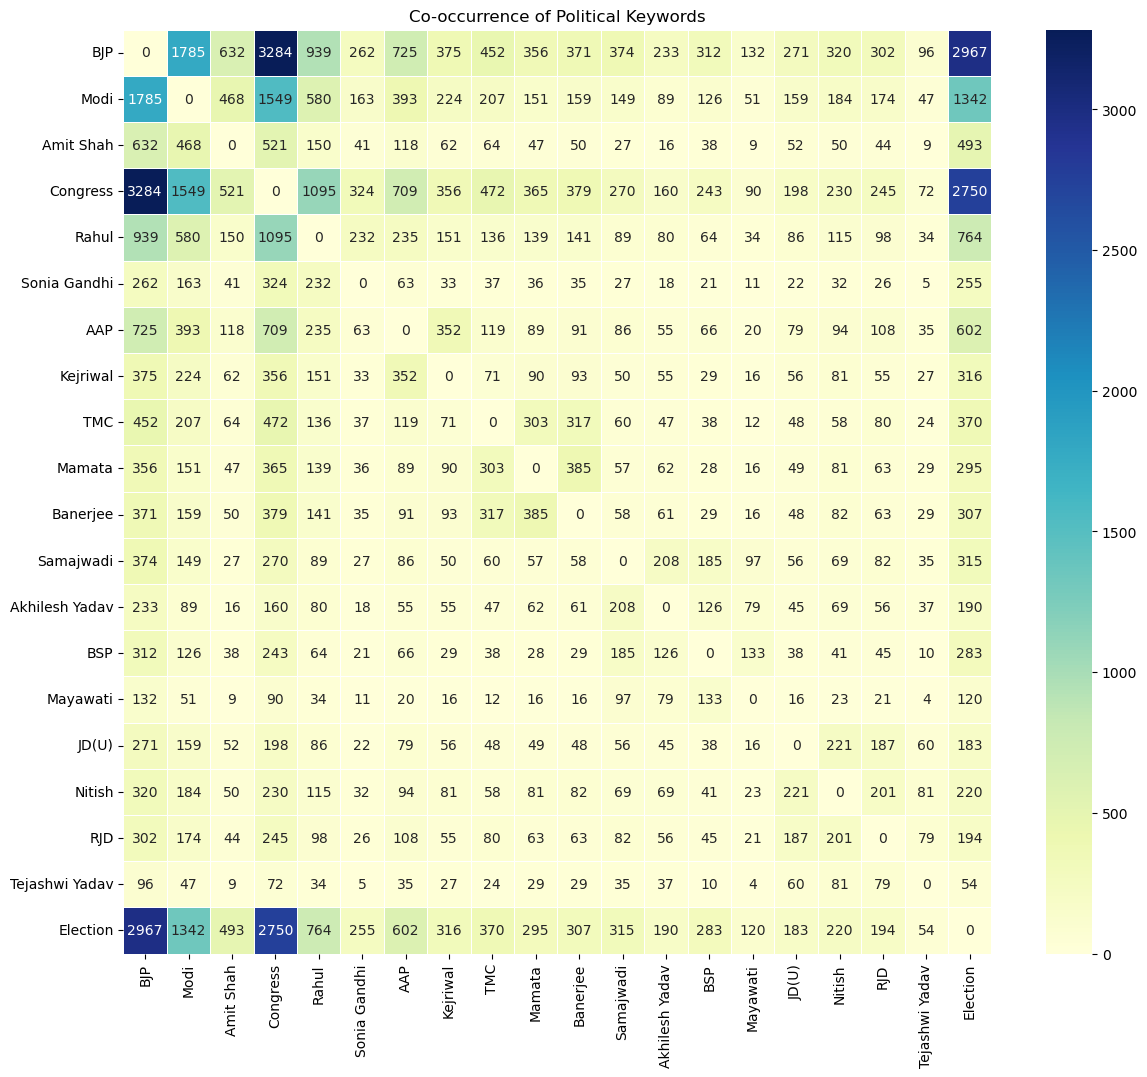

In [26]:
# Plotting the heatmap of the co-occurrence matrix
plt.figure(figsize=(14, 12))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title('Co-occurrence of Political Keywords')
plt.show()

The heatmap provides a visual representation of the co-occurrence of political keywords in the articles:

- Darker shades indicate higher co-occurrence, while lighter shades represent lower co-occurrence.
- As expected, terms closely associated with specific parties or leaders (e.g., "BJP" with "Modi" or "AAP" with "Kejriwal") have higher co-occurrence values.
- The term "Election" has notable co-occurrence with various parties and leaders, suggesting that many articles discuss these entities in the context of elections.

# Average Monthly Sentiment of Articles

/opt/conda/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


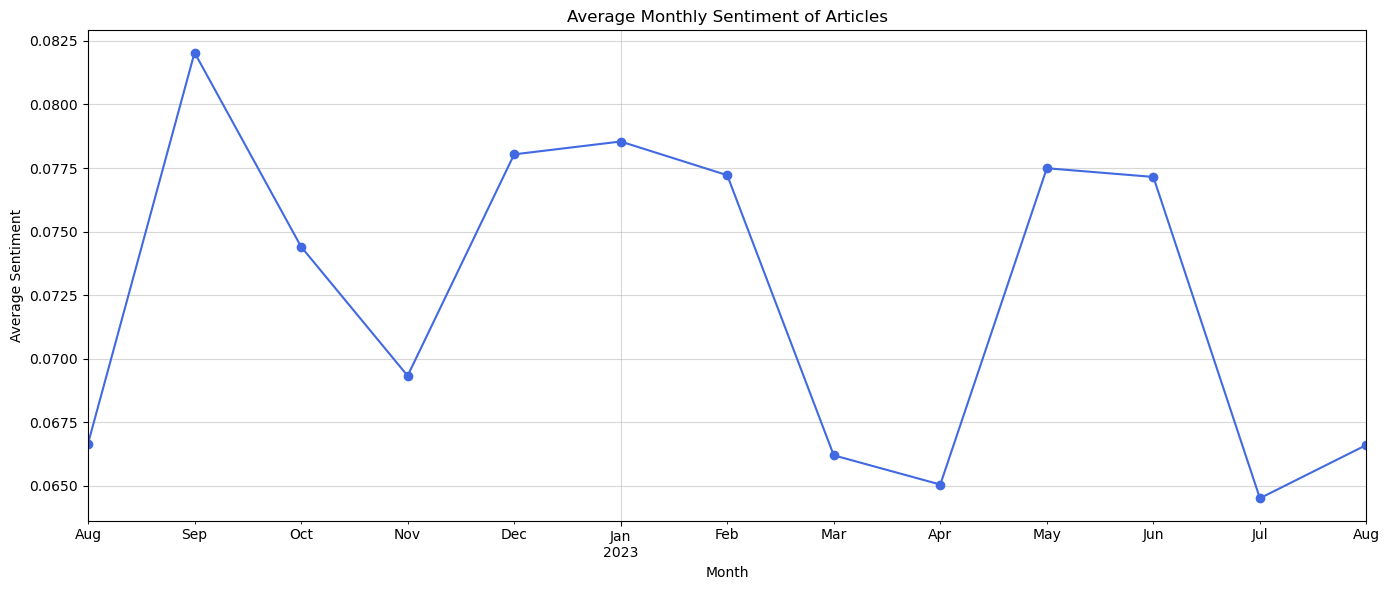

In [27]:
# Convert 'Timestamp' column to datetime format
indian_express_data['Timestamp'] = pd.to_datetime(indian_express_data['Timestamp'], errors='coerce')

# Extract month and year from 'Timestamp'
indian_express_data['Year_Month'] = indian_express_data['Timestamp'].dt.to_period('M')

# Group by month and compute the average sentiment
monthly_sentiment = indian_express_data.groupby('Year_Month')['Sentiment'].mean()

# Plotting the monthly sentiment
plt.figure(figsize=(14, 6))
monthly_sentiment.plot(color='royalblue', marker='o')
plt.title('Average Monthly Sentiment of Articles')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

The line graph depicts the average monthly sentiment of articles:

- There is a general fluctuation in sentiment over the months.
- Some months, like February and November, show a noticeable dip in sentiment.
- There is a peak around the mid-year, with sentiments being more positive in June and July.

# Political Comparision of Sentiment

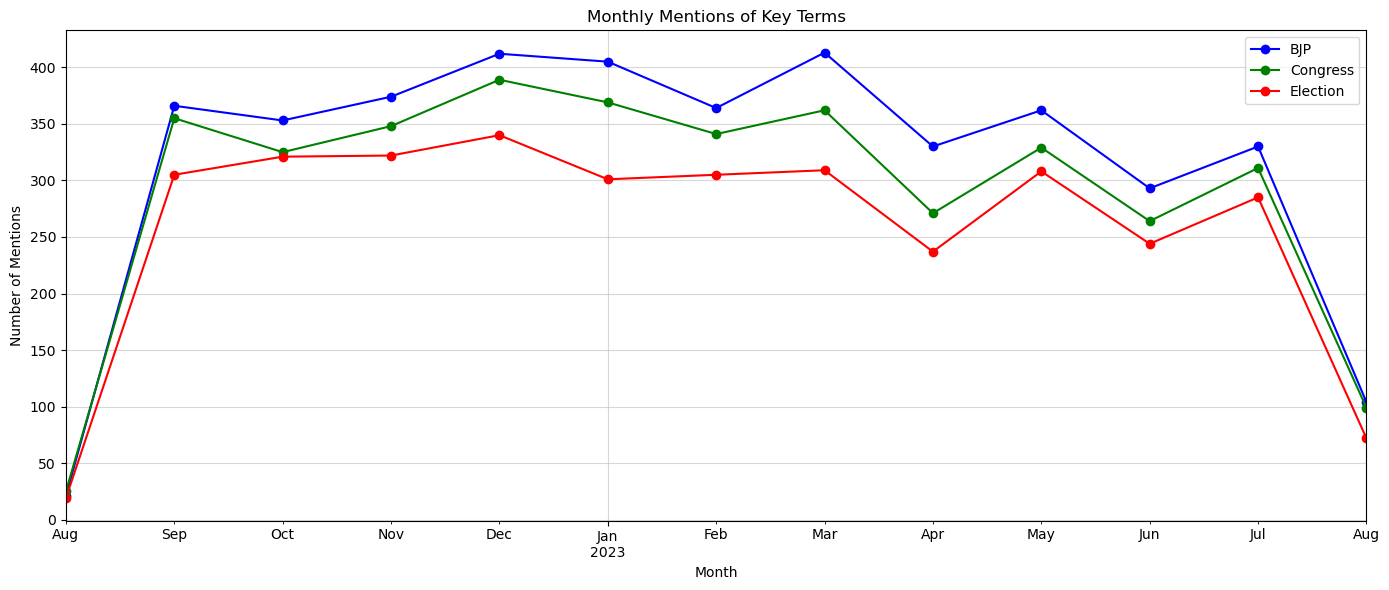

In [28]:
# Extract monthly mentions for the key terms
bjp_monthly_mentions = indian_express_data[indian_express_data['News Content'].str.contains('BJP', case=False, na=False)].groupby('Year_Month').size()
congress_monthly_mentions = indian_express_data[indian_express_data['News Content'].str.contains('Congress', case=False, na=False)].groupby('Year_Month').size()
election_monthly_mentions = indian_express_data[indian_express_data['News Content'].str.contains('Election', case=False, na=False)].groupby('Year_Month').size()

# Plotting the monthly mentions
plt.figure(figsize=(14, 6))
bjp_monthly_mentions.plot(label='BJP', color='blue', marker='o')
congress_monthly_mentions.plot(label='Congress', color='green', marker='o')
election_monthly_mentions.plot(label='Election', color='red', marker='o')
plt.title('Monthly Mentions of Key Terms')
plt.xlabel('Month')
plt.ylabel('Number of Mentions')
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

The line graph illustrates the monthly mentions of key terms:

- **BJP:** The mentions of BJP remain relatively steady throughout the year, with noticeable spikes in February and November.
- **Congress:** Mentions of Congress also remain consistent, with a significant increase in November.
- **Election:** The term "Election" has a noticeable peak around May, indicating a heightened focus on elections during this period.

The spikes could be related to specific political events, campaigns, or significant developments involving these entities.

In [29]:
# Filter articles from May
may_articles = indian_express_data[indian_express_data['Year_Month'] == '2023-05']['News Content'].dropna()

# Vectorize the articles using TF-IDF with adjusted parameters
tfidf_vectorizer_adjusted = TfidfVectorizer(max_df=0.85, min_df=3, stop_words='english')
tfidf_may = tfidf_vectorizer_adjusted.fit_transform(may_articles)

# Apply LDA for topic modeling
lda_model.fit(tfidf_may)

# Extract topics for May
may_topics = display_topics(lda_model, tfidf_vectorizer_adjusted.get_feature_names_out(), no_top_words)
may_topics

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,congress,30.0,wrestlers,2.7,kuki,3.2,rampur,1.8,mukhtar,0.2
1,government,15.3,medals,0.6,zomi,1.1,azam,1.7,parishads,0.2
2,state,14.9,brij,0.6,meitei,1.1,suar,1.2,chairpersons,0.2
3,karnataka,14.7,mahapanchayat,0.3,kukis,1.0,chairpersons,0.9,wrestlers,0.2
4,cm,11.8,punia,0.3,churachandpur,1.0,parishads,0.6,brij,0.2
5,seats,11.8,phogat,0.3,biren,0.8,apna,0.5,kuki,0.2
6,leader,10.0,ganga,0.3,meiteis,0.8,palika,0.5,vrindavan,0.2
7,leaders,9.9,ranjit,0.3,myanmar,0.7,pasmanda,0.4,rampur,0.2
8,people,9.8,brijendra,0.3,nagas,0.6,ansari,0.3,haokip,0.2
9,siddaramaiah,9.6,harassment,0.3,haokip,0.5,chauhan,0.3,ranjit,0.2


For the articles published in May, here are the dominant topics identified using LDA:

**Topic 0:**
Key terms: congress, government, state, karnataka, cm, seats, leader, leaders, people, siddaramaiah.
This topic seems to revolve around political dynamics, especially in the state of Karnataka, with mentions of Congress and key figures like Siddaramaiah.

**Topic 1:**
Key terms: wrestlers, medals, brij, mahapanchayat, punia, phogat, ganga, ranjit, brijendra, harassment.
This topic seems to touch upon sports, possibly wrestling, with mentions of athletes and medals.

**Topic 2:**
Key terms: kuki, zomi, meitei, kukis, churachandpur, biren, meiteis, myanmar, nagas, haokip.
This topic likely addresses ethnic groups and regional issues, possibly in the northeastern part of India.

**Topic 3:**
Key terms: rampur, azam, suar, chairpersons, parishads, apna, palika, pasmanda, ansari, chauhan.
This topic seems to be focused on local politics and administrative units, with mentions of places like Rampur.

**Topic 4:**
Key terms: mukhtar, parishads, wrestlers, brij, kuki, vrindavan, rampur, haokip, ranjit.
This topic is a mix of local politics and other themes.

From this analysis, it's evident that May had a diverse range of discussions, from state politics to regional and ethnic issues.

# Please suggest for any improvements and upvote if you like